In [93]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

## Loading Datasets

In [94]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000) 

## Sample Review

In [95]:
words_index = imdb.get_word_index()
reversed_dict = dict([(index,name) for (name,index) in words_index.items()])
text_summary = ' '.join(reversed_dict.get(i-3,'?') for i in train_data[0]) # first 3 indices reserved
text_summary # 0 for padding, 1 for starting seq and 3 for unknown word

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Sample Review
<h4 style="margin-top: 5px; color: red">0 for negative review</h4>
<h4 style="margin-top: 5px; color: green">1 for positive review</h4>

In [96]:
train_labels[0]

1

In [97]:
print(max([max(sequence) for sequence in train_data]))
print(max([max(sequence) for sequence in test_data]))

9999
9999


### Vectorizing Sequences

In [98]:
def vectorize(sequences, max_dim = 10000):
    ret_arr = np.zeros((len(sequences),max_dim))
    for i,val in enumerate(sequences):
        ret_arr[i,val] = 1 # rest will remain 0
    return ret_arr

X_train = vectorize(train_data)
X_test = vectorize(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [99]:
model = Sequential()
model.add(Input(shape=(10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,161 (625.63 KB)

 Trainable params: 160,161 (625.63 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
stopping_criteria = EarlyStopping(monitor = 'val_accuracy', patience = 3, restore_best_weights = True)
history = model.fit(X_train, y_train,validation_split = 0.1, batch_size =1024, epochs = 20,callbacks = [stopping_criteria])

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6410 - loss: 0.6441 - val_accuracy: 0.8580 - val_loss: 0.4355
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8859 - loss: 0.3687 - val_accuracy: 0.8896 - val_loss: 0.3211
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9233 - loss: 0.2513 - val_accuracy: 0.8912 - val_loss: 0.2886
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9421 - loss: 0.1917 - val_accuracy: 0.8916 - val_loss: 0.2803
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9508 - loss: 0.1619 - val_accuracy: 0.8908 - val_loss: 0.2814
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9594 - loss: 0.1393 - val_accuracy: 0.8876 - val_loss: 0.2914
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9655 - loss: 0.1209 - val_accuracy: 0.8888 - val_loss: 0.3026


In [101]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

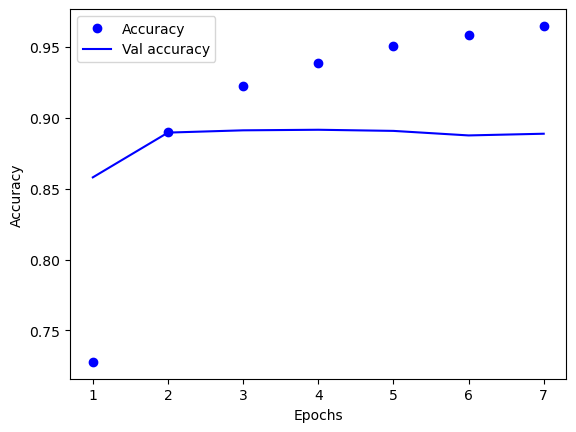

In [102]:
total_epochs_run = range(1,len(history.history['accuracy'])+1)
plt.plot(total_epochs_run,history.history['accuracy'], 'bo',label = 'Accuracy')
plt.plot(total_epochs_run,history.history['val_accuracy'], 'b',label = 'Val accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluating the Model

In [104]:
loss, accuracy = model.evaluate(X_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.8842 - loss: 0.2905
